In [23]:
%pwd ##Checknig the directory for importing the data 

'C:\\Users\\Ecourt'

In [8]:
#Importing the necessary packages 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()

In [9]:
gender= pd.read_csv('Gender_Classification.csv')

In [11]:
gender.head()

###The data of Gender Classification has sample of 66 persons each person has favorite Color, Music, Alcoholic Beverage,
### and Soft drink we will try to fit  KNN classifier for the data and try to find max accuracy

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [12]:
gender.tail()


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M
65,Cool,Electronic,Beer,Coca Cola/Pepsi,M


In [15]:
gender.shape



(66, 5)

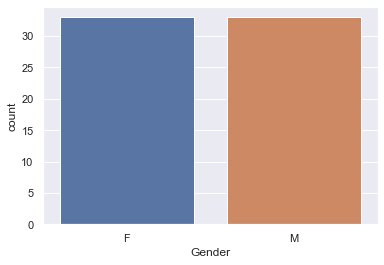

In [18]:
sns.countplot(x = gender.Gender, y=None)

## AS we can see the below plot shows that both MAle and Female are equally distributed 
## ie both Male and Female have equal count of samples.

In [13]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
##Visualizing the data 
sns.countplot(gender.Gender)

plt.title("Gender Count",color = 'Blue',fontsize=15)


###Ffrom above plot we can conclude that the data is equally distributed ie both Male and Female have equal counts.

NameError: name 'gender' is not defined

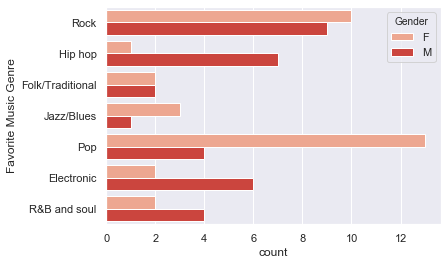

In [76]:
sns.countplot(y='Favorite Music Genre', hue='Gender', data=gender, palette='Reds');

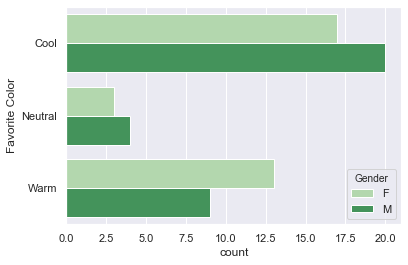

In [77]:
sns.countplot(y='Favorite Color', hue='Gender', data=gender, palette='Greens');

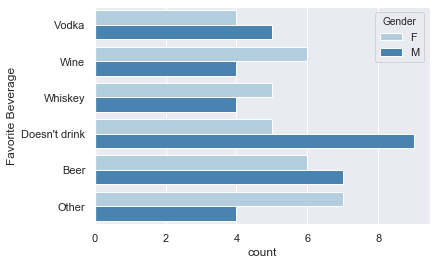

In [78]:
sns.countplot(y='Favorite Beverage', hue='Gender', data=gender, palette='Blues');

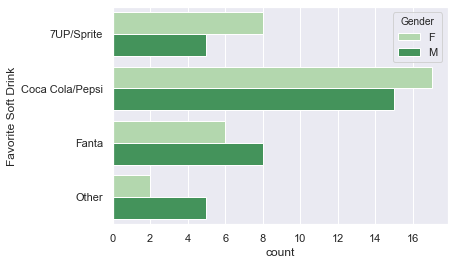

In [84]:
sns.countplot(y='Favorite Soft Drink', hue='Gender', data=gender, palette='Greens');

In [88]:
from sklearn.preprocessing import LabelEncoder

gender = gender.copy(deep = True)
Color = LabelEncoder()
gender['Favorite Color'] = Color.fit_transform(gender['Favorite Color'])

Genre = LabelEncoder()
gender['Favorite Music Genre'] = Genre.fit_transform(gender['Favorite Music Genre'])

Beverage = LabelEncoder()
gender['Favorite Beverage'] = Beverage.fit_transform(gender['Favorite Beverage'])


Drink = LabelEncoder()
gender['Favorite Soft Drink'] = Drink.fit_transform(gender['Favorite Soft Drink'])


Gender = LabelEncoder()
gender['Gender'] = Gender.fit_transform(gender['Gender'])

In [89]:
print(gender)

    Favorite Color  Favorite Music Genre  Favorite Beverage  \
0                0                     6                  3   
1                1                     2                  3   
2                2                     6                  5   
3                2                     1                  4   
4                0                     6                  3   
..             ...                   ...                ...   
61               0                     6                  3   
62               0                     2                  0   
63               1                     2                  1   
64               0                     6                  5   
65               0                     0                  0   

    Favorite Soft Drink  Gender  
0                     0       0  
1                     1       0  
2                     1       0  
3                     2       0  
4                     1       0  
..                  ...     ...  
61   

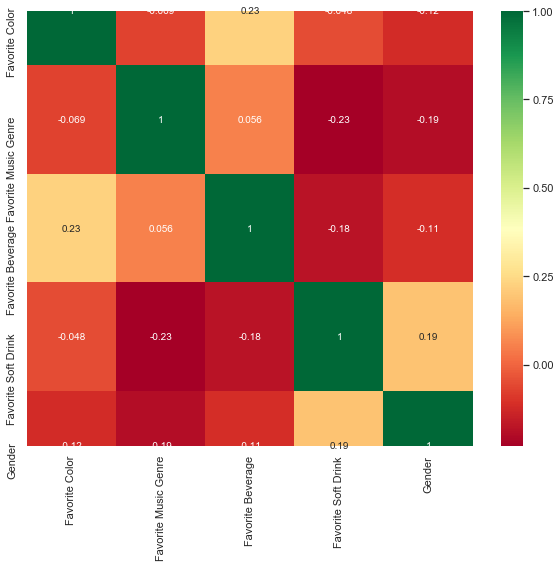

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))  
p=sns.heatmap(gender.corr(), annot=True,cmap ='RdYlGn')

##Below plot will show the Correlation between ColorVSgender  DrinkVSgender  SoftdrinkVSgender and MusicVSgender

## Correlation plot does not show very high amount of correlation between variables of the datasets.


In [111]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(gender.drop(["Gender"],axis = 1),),
        columns=['Favorite Color','Favorite Music Genre ','Favorite Beverage','Favorite Soft Drink'])
print(X)

Y = gender.Gender
print(Y)

##In this part we tried to scale the data and we dropped the Gender coolumn from the data for train test split 

    Favorite Color  Favorite Music Genre   Favorite Beverage  \
0        -0.841969               1.126328           0.430139   
1         0.247638              -0.829926           0.430139   
2         1.337246               1.126328           1.588881   
3         1.337246              -1.318989           1.009510   
4        -0.841969               1.126328           0.430139   
..             ...                    ...                ...   
61       -0.841969               1.126328           0.430139   
62       -0.841969              -0.829926          -1.307974   
63        0.247638              -0.829926          -0.728603   
64       -0.841969               1.126328           1.588881   
65       -0.841969              -1.808052          -1.307974   

    Favorite Soft Drink  
0             -1.388118  
1             -0.257059  
2             -0.257059  
3              0.874000  
4             -0.257059  
..                  ...  
61            -0.257059  
62            -0.257059

In [112]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.75, stratify=Y)

In [144]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,14):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

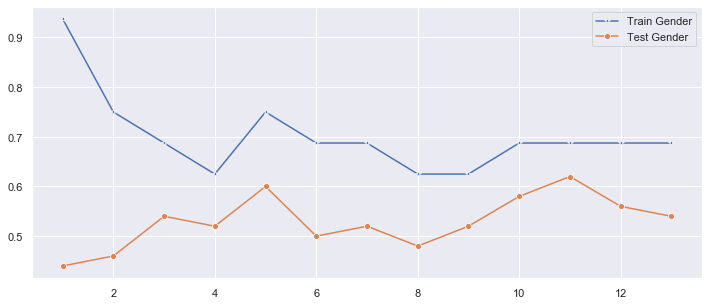

In [146]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,14),train_scores,marker='*',label='Train Gender')
p = sns.lineplot(range(1,14),test_scores,marker='o',label='Test Gender')

In [147]:
### From above plot we can see that the max accuracy is obtained at K=11 
##Because both train gender and test gender points are close to each other 


In [164]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

## As we can see maximum accuracy is obtained at K=11

0.62

In [151]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix


In [158]:
##We try to cnclude the model from confusion matrix 
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,22,3,25
1,16,9,25
All,38,12,50


Text(0.5, 12.5, 'Predicted Gender')

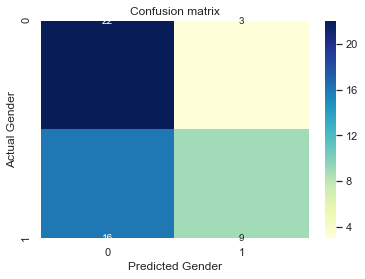

In [162]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=0)
plt.ylabel('Actual Gender')
plt.xlabel('Predicted Gender')

In [ ]:
## From the above model we can conclude that the given data is not very usefull to predict the gender or the dataset given
## is not enough to predict the gender as the max accuracy from KNN is 0.62 
## Confusion matrix shows that there is large number of predicted values that are wrong .

## As far as the model is concerned it is not a good model and needs more accuracy.


In [12]:
###Logistic Regression 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(gender.drop(["Gender"],axis = 1),),
        columns=['Favorite Color','Favorite Music Genre ','Favorite Beverage','Favorite Soft Drink'])
print(X)

Y = gender.Gender
print(Y)

##In this part we tried to scale the data and we dropped the Gender coolumn from the data for train test split 

NameError: name 'gender' is not defined

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.75, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
 
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))


NameError: name 'X' is not defined